In [1]:
import plotly.express as px
import pandas as pd
import numpy as np


df = pd.read_csv("data/FIADB_AR.csv")

In [2]:
df

DIA  INVYR        LAT        LON  AZIMUTH  DIST  ELEV
0      1.53   2017  34.173930 -91.217937      NaN   NaN   190
1      1.73   2017  34.173930 -91.217937      NaN   NaN   190
2      6.40   2017  34.173930 -91.217937      NaN   NaN   190
3      3.90   2017  34.173930 -91.217937      NaN   NaN   190
4      5.80   2017  34.173930 -91.217937      NaN   NaN   190
...     ...    ...        ...        ...      ...   ...   ...
23315  2.70   2017  35.142245 -91.971481      NaN   NaN   280
23316  1.80   2017  35.142245 -91.971481      NaN   NaN   280
23317  1.50   2017  35.142245 -91.971481      NaN   NaN   280
23318  1.40   2017  35.142245 -91.971481      NaN   NaN   280
23319  5.30   2017  35.142245 -91.971481      NaN   NaN   280

[23320 rows x 7 columns]

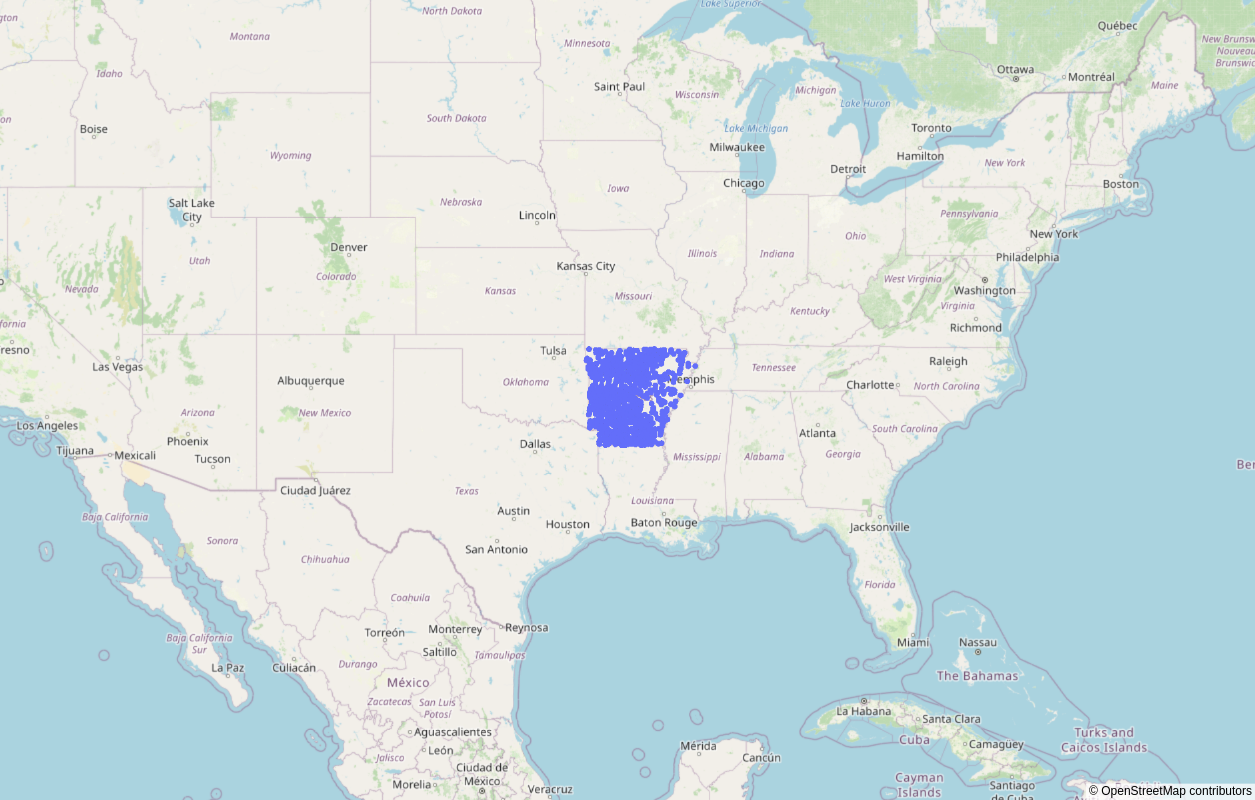

In [3]:
# temp to remove Azimuth and Dist (broken)
try:
    df = df.drop(['AZIMUTH', 'DIST'], axis=1)
except:
    pass
# remove NA / NaN values
df.dropna(
    axis=0,
    how='any',
    thresh=None,
    subset=None,
    inplace=True
)

color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(df, 
                        lat="LAT", 
                        lon="LON", 
                        color_continuous_scale=color_scale,
                        zoom=4, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [4]:
print(f"MAX YEAR = {df['INVYR'].max()}, MIN YEAR = {df['INVYR'].min()}")

MAX YEAR = 2017, MIN YEAR = 2017


In [5]:
(lat_min, lat_max) = (df["LAT"].min(), df["LAT"].max())
(lon_min, lon_max) = (df["LON"].min(), df["LON"].max())

(lat_min, lat_max) = (abs(lat_max), abs(lat_min)) if abs(lat_min) > abs(lat_max) else (abs(lat_min), abs(lat_max))
(lon_min, lon_max) = (abs(lon_max), abs(lon_min)) if abs(lon_min) > abs(lon_max) else (abs(lon_min), abs(lon_max))

(lat_min_neg, lat_max_neg) = (df["LAT"].min(), df["LAT"].max())
(lon_min_neg, lon_max_neg) = (df["LON"].min(), df["LON"].max())

print(f"""
(lat_min, lat_max) = {(lat_min_neg, lat_max_neg)}
(lon_min, lon_max) = {(lon_min_neg, lon_max_neg)}
""")

print(f"""
(lat_min, lat_max) = {(lat_min, lat_max)}
(lon_min, lon_max) = {(lon_min, lon_max)}
""")


(lat_min, lat_max) = (33.017774, 36.498165)
(lon_min, lon_max) = (-94.545004, -89.775159)


(lat_min, lat_max) = (33.017774, 36.498165)
(lon_min, lon_max) = (89.775159, 94.545004)



In [6]:
def calc_bin(m_in, m_ax, res):
    return (m_ax-m_in)/res
res = .1
nbins_lon = int(calc_bin(lon_min, lon_max, res))   
nbins_lat = int(calc_bin(lat_min, lat_max, res)) 
print(f"(nbins_lon, nbins_lat) = {(nbins_lon, nbins_lat)}")

(nbins_lon, nbins_lat) = (47, 34)


In [7]:
#  from: https://topic.alibabacloud.com/a/latitude-and-longitude-offset-angle-and-offset-distance-are-known-to-calculate-the-latitude-and-longitude_8_8_31713399.html
def offset_long_lat(origin_lon, origin_lat, azimuth, distance):
    lonlat = [0.0, 0.0];
    if ( distance > 0 ):
        lonlat [0] = origin_lon + distance * np.sin(azimuth * np.PI/180) * 180/(np.pi * 6371229 * np.cos(origin_lat * np.PI/180 ));
        lonlat [1] = origin_lat + distance * np.cos(azimuth * np.PI/180)/(np.pi * 6371229/180 );

    else:
        lonlat [0] = origin_lon;
        lonlat [1] = origin_lat;
    
    return lonlat;

# feet to long/lat distance
def feet_to_lat_lon(feet_input):
    #     69.4 miles to degree lat?/long? 
    return 

def offset_subplot_center(sp=[1,2,3,4]):
    
# offset process
# plot center is subplot1 center
# for subplot2 120 feet north (lat change lon same)

# for each subplot make a offset subplpot center
#  convert latitude longitude to albers equal area conic usgs projection


In [8]:
# for index, row in df.iterrows():
#     print(row['LAT'], row['LON'], )

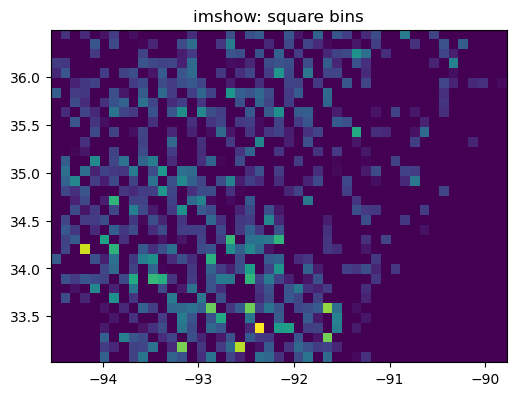

In [9]:
from matplotlib.image import NonUniformImage
import matplotlib.pyplot as plt
from scipy import stats
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import cm
import xlrd

lon_bins = np.linspace(lon_min,
                       lon_max,
                       nbins_lon+1
                      )

lat_bins = np.linspace(lat_min,
                       lat_max,
                       nbins_lat+1)
xedges = nbins_lon
yedges = nbins_lat

x = df["LON"]
y = df["LAT"]

density, xedges, yedges = np.histogram2d(x, y,[xedges, yedges])

density = density.T
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(131, title='imshow: square bins')
plt.imshow(density, interpolation='nearest', origin='lower',
        extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]])

In [10]:
Lat = df["LAT"].values
Lon = df["LON"].values

(-60601.65126464903, -43606048.15808773, 14123725.411850046, 473551.7251105332)


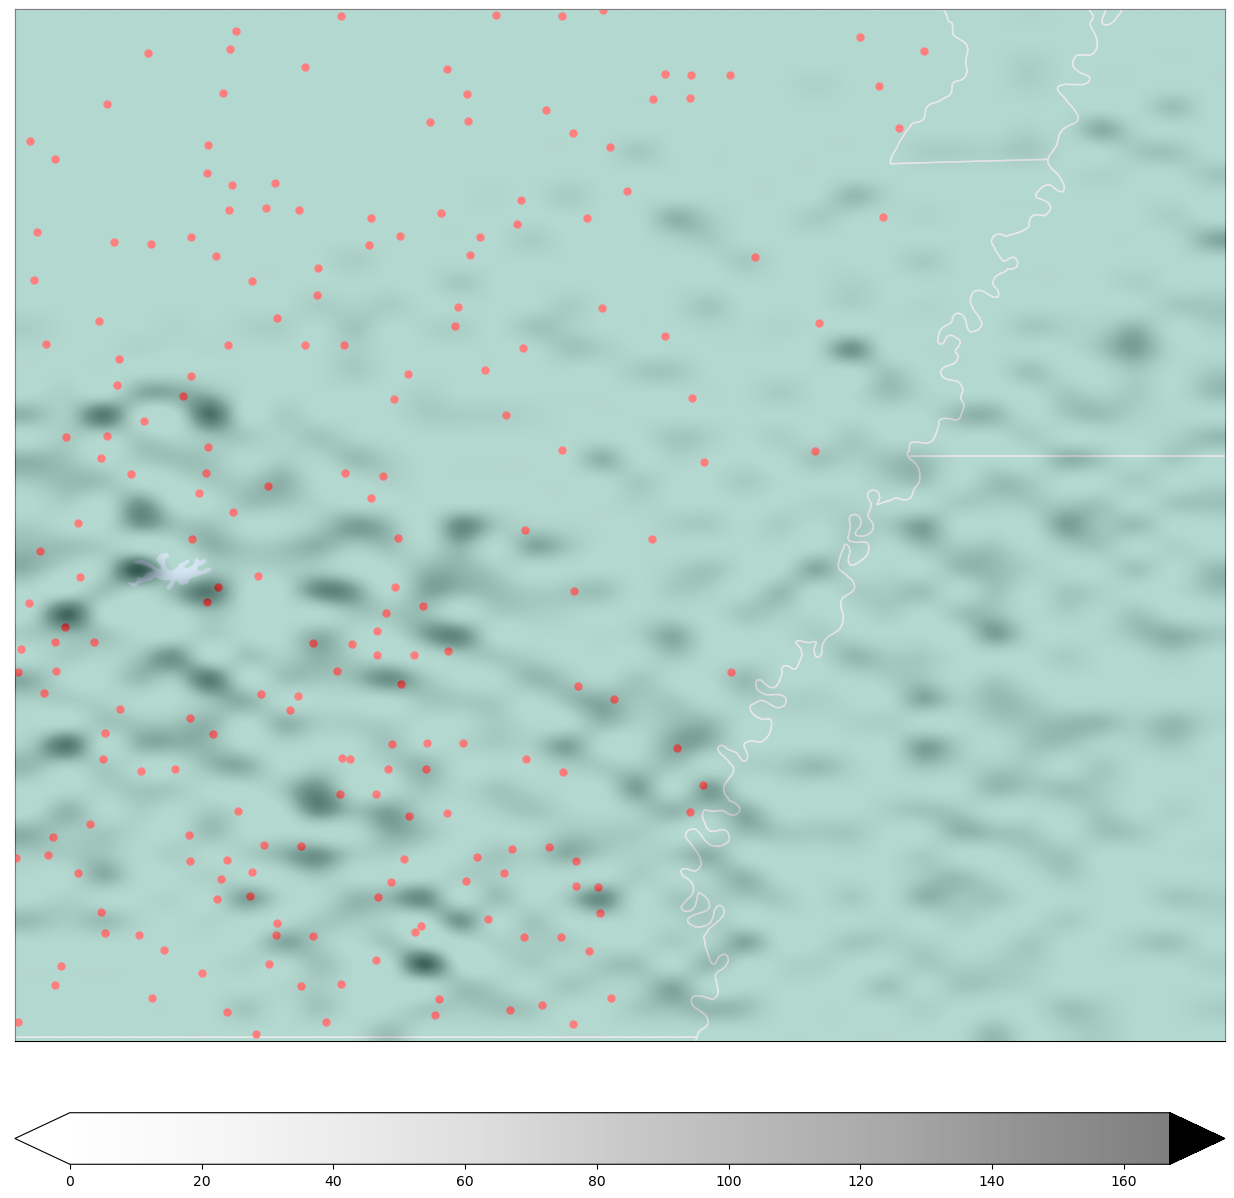

In [11]:
offset_map = 0
map = Basemap(projection='merc',
              llcrnrlon=-94 - offset_map,
              llcrnrlat=33.0 - offset_map,
              urcrnrlon=-89 + offset_map,
              urcrnrlat=36.5 + offset_map,
              resolution='f')

fig=plt.figure(figsize=(20,15))

# Continent in green
map.fillcontinents(color='#69b2a2',lake_color='#A6CAE0')
map.drawstates(color='lightgrey', linewidth=1)
map.drawcountries()

# from: https://stackoverflow.com/questions/42933002/converting-lat-lon-to-x-y-in-matplotlib-for-imshow
x0, y0 = map(lon_min_neg, lon_max_neg)
x1, y1 = map(lat_min_neg, lat_max_neg)
extent= (x0, y0, x1, y1) # lonmin, lonmax, latmin, latmax
print(extent)

a = map.imshow(density.T,
               interpolation='spline36',
               alpha=0.5,
               cmap='Greys',
               extent = extent,
               zorder = 3) #Lat is up or down, Long is left or right. 
cbar = map.colorbar(a,'bottom', pad='7%',extend='both')
count = 0
for lons, lats in zip(Lon, Lat):
    count += 1
    if(count % 100 == 0): #only do every 1000th tree
        x, y = map.projtran(lons,lats)
        map.plot(x,y,'ro',markersize=5)



In [12]:
density.max()

167.0